# Introduccion Computer Vision parte 2

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Deteccion de bordes

In [33]:
img = cv.imread('cat.jpg',cv.IMREAD_GRAYSCALE)

Sobel

In [34]:
sobel_vertical = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
sobel_horizontal = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

In [35]:
sobel_vertical[sobel_vertical<0]

array([ -2.,  -8.,  -8., ..., -34., -32., -16.])

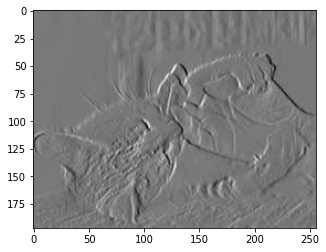

In [36]:
# Graficamos
plt.imshow(sobel_horizontal, cmap='gray')

In [37]:
sobel_h_np = np.array(np.abs(sobel_horizontal),dtype=np.uint8)
sobel_v_np = np.array(np.abs(sobel_vertical),dtype=np.uint8)

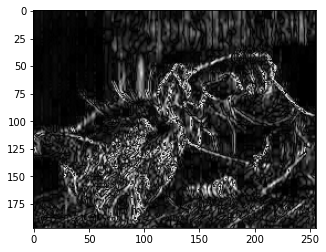

In [38]:
plt.imshow(sobel_h_np, cmap='gray') # Horizontal

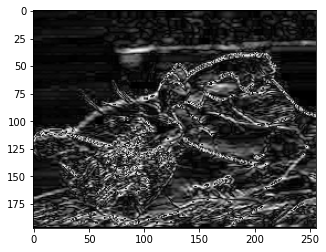

In [39]:
plt.imshow(sobel_v_np, cmap='gray') # Horizontal

In [40]:
# Total
sobel_total = sobel_h_np + sobel_v_np
sobel_total[sobel_total>255] = 255

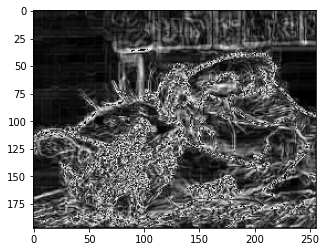

In [41]:
plt.imshow(sobel_total, cmap='gray')

Laplaciano

In [42]:
laplaciano = cv.Laplacian(img, cv.CV_64F)

In [43]:
lapl_np = np.array(np.abs(laplaciano), dtype=np.uint8)

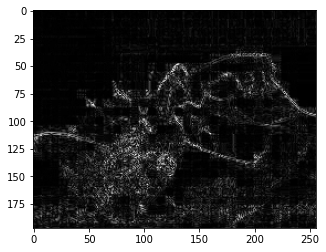

In [44]:
plt.imshow(lapl_np, cmap='gray')

## 2. Deteccion de contornos

In [45]:
img = cv.imread('fig.jpg')

In [64]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [57]:
bordes = cv.Laplacian(img_gray, cv.CV_64F)
bordes = np.array(np.abs(bordes), np.uint8)

In [53]:
bordes = cv.Canny(img, 100, 200)

In [54]:
bordes

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
contornos, jerarquia = cv.findContours(bordes, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [65]:
for c in contornos:
  x,y,w,h = cv.boundingRect(c)
  if (h>40 and w>40):
    cv.rectangle(img_rgb, (x,y), (x+w, y+h), (255,0,0),3)

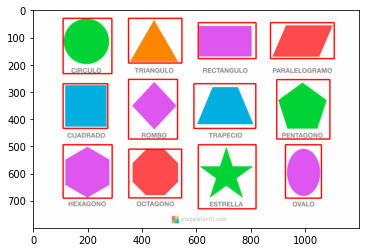

In [66]:
plt.imshow(img_rgb)

Otras tecnicas utilizadas 

* HOG
* Cascade
* Patrones LBP
* SIFT